# Characteristics of Second Order Systems

## Car Suspension: Spring-Mass-Damper System

A car suspension (shock absorbers) includes a spring and damper. The spring absorbs bumps in the road and the damper keeps the spring from oscillating too much.

![](https://www.howacarworks.com/illustration/127/coil-spring.base@1x.jpg)


We will use this classic example to understand the characteristics of second order linear systems. These ideas generalize to higher-order linear and nonlinear systems. Figure source: [How a Car Works](https://www.howacarworks.com/basics/how-car-springs-and-dampers-work)

### Mathematical Model

We will start with a free body diagram (figure source: [Wikipedia](https://en.wikipedia.org/wiki/Mass-spring-damper_model)) and sum of forces acting on mass $m$:

![](https://upload.wikimedia.org/wikipedia/commons/thumb/4/45/Mass_spring_damper.svg/663px-Mass_spring_damper.svg.png)


$$\sum F = \quad \underbrace{-kx}_{\text{Hooke's~law}} \quad + \quad \underbrace{-c \dot{x}}_{\text{damper}} \quad + \quad \underbrace{f(t)}_{\text{input}} = \quad m \underbrace{\ddot{x}}_{\text{acceleration}}$$

We can rewrite this as a coupled system of linear ODEs:

$$
\dot{v} = -\frac{k}{m} x - \frac{c}{m} v + \frac{f(t)}{m}, \qquad \dot{x} = v
$$

Let's assume the mass of the car is 450 kg per wheel. Furthermore, let's assume the spring constant $k$ is 100,000 N/m and the dampening constant $c$ is 2,000 Ns/m. Of course, this is a simplified model for a car suspection. See [this example](https://ctms.engin.umich.edu/CTMS/index.php?example=Suspension&section=SystemModeling) of a more sophisticate model of a bus' suspension.

### Numeric Simulation

Let's consider the empty car starts at rest. Then at time zero, the driver, who weighs 80 kg, gets into the car. The external forcing function is $-80~\text{kg} \times 9.81~\text{m}~\text{s}^{-2} \times 1/4 = 196~\text{N}$ per tire. 

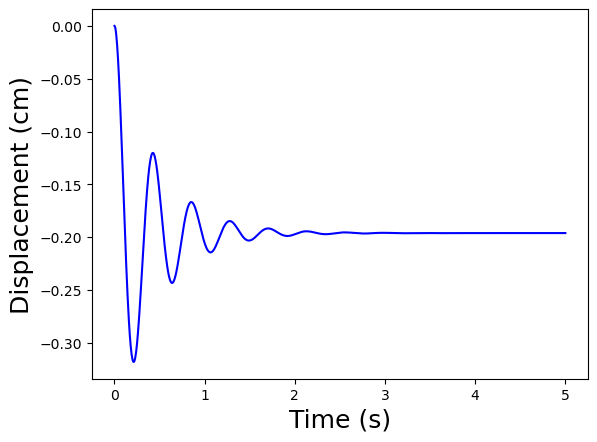

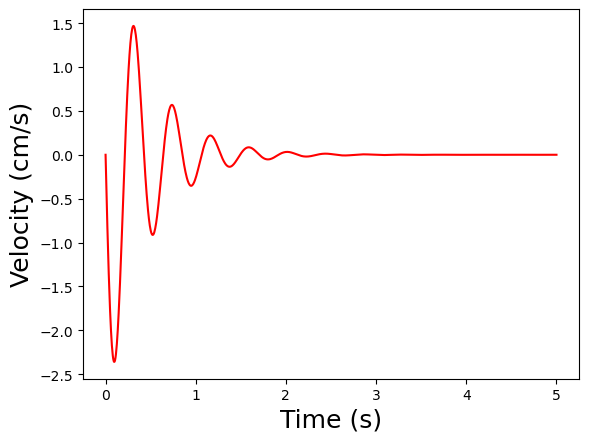

In [2]:
import scipy.integrate
import numpy as np
import matplotlib.pyplot as plt

def suspension(t, y, f= lambda t: 0.0, k=1E5, c=2E3, m=450):
    ''' Linear model of a car suspension system

    Arguments:
    t: time (s)
    y: array of the state variables [x, v] 
        where x is the displacement (m) and v is the velocity (m/s)
    f: extenal forcing function (N)
    k: spring constant (N/m)
    c: damping constant (Ns/m)
    m: mass per wheel (kg)
    '''

    # unpack state variables
    x, v = y

    # derivative of velocity
    vdot = (-k*x - c*v + f(t))/m

    # derivative of displacement
    xdot = v

    return np.array([xdot, vdot])


def simulate_driver_getting_in(driver_mass=80, k=1E5, c=2E3):
    ''' Simulate the suspension system with a step input (driver getting in)

    Arguments:
    driver_mass: mass of the driver (kg)
    k: spring constant (N/m)
    c: damping constant (Ns/m)

    '''


    initial_conditions = [0.0, 0.0]
    t_span = [0, 5]
    t_eval = np.linspace(*t_span, 1000)
    g = 9.81 # m/s^2

    driver_gets_in = lambda t,y: suspension(t, y, lambda t_: -driver_mass*g/4, k, c)

    solution = scipy.integrate.solve_ivp(driver_gets_in, t_span, initial_conditions, t_eval=t_eval)
    plt.plot(solution.t, solution.y[0]*100,color='b')
    plt.xlabel('Time (s)',fontsize=18)
    plt.ylabel('Displacement (cm)',fontsize=18)
    plt.show()

    plt.plot(solution.t, solution.y[1]*100,color='r')
    plt.xlabel('Time (s)',fontsize=18)
    plt.ylabel('Velocity (cm/s)',fontsize=18)
    plt.show()

simulate_driver_getting_in()

### Activity

Simulate the following what if scenarios:
* Double the spring stiffness
* Double the strength of the dampers
* Four people instead of one person gets in the car

Do the results make sense?

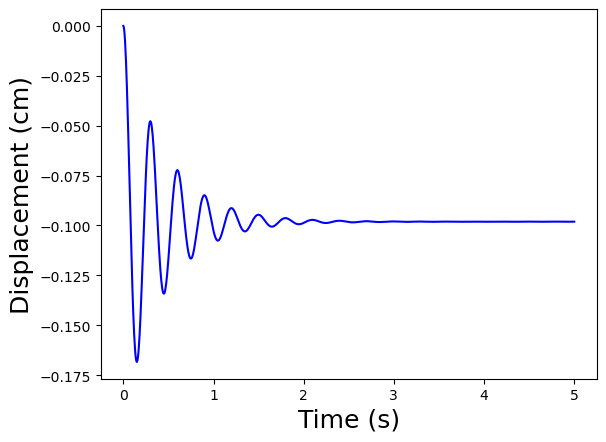

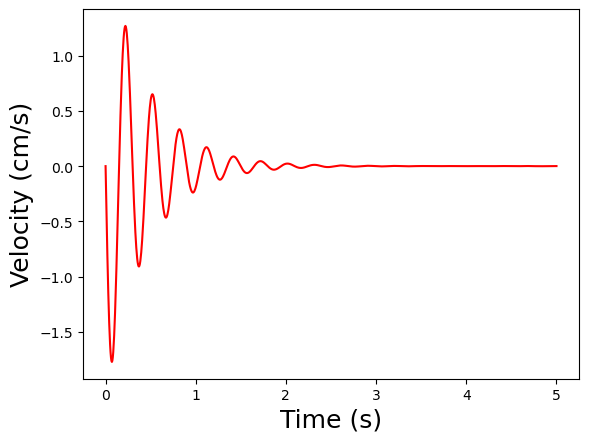

In [15]:
# Double the spring constant
simulate_driver_getting_in(k=2E5)

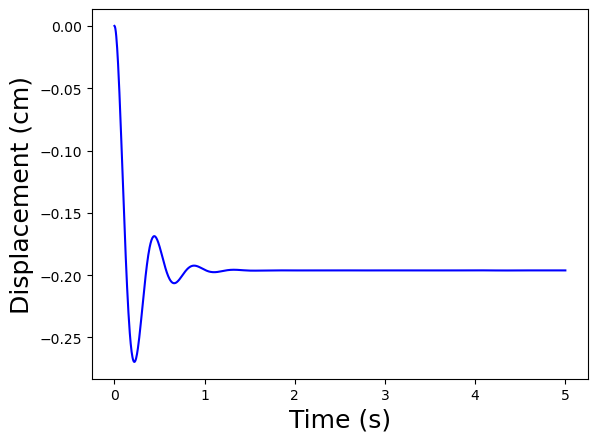

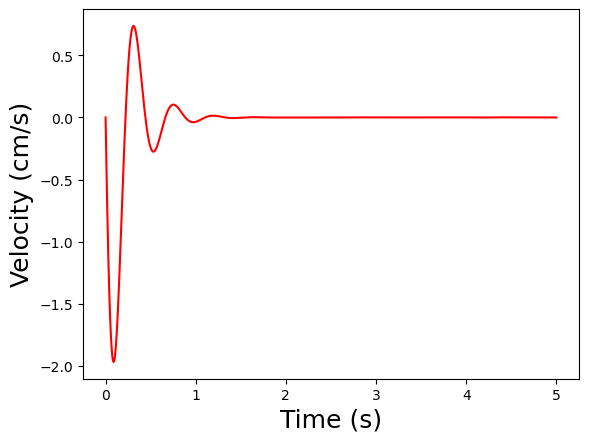

In [16]:
# Double the damping constant
simulate_driver_getting_in(c=4E3)

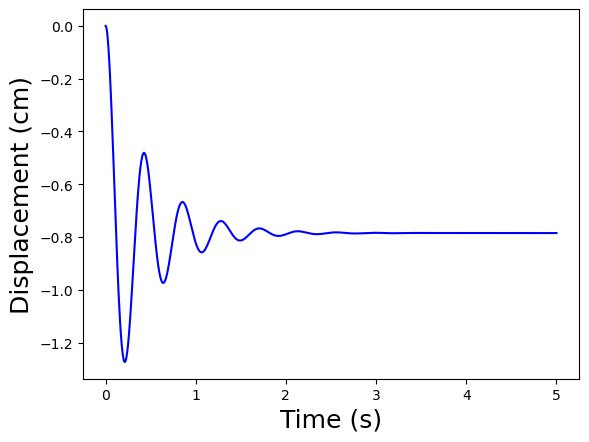

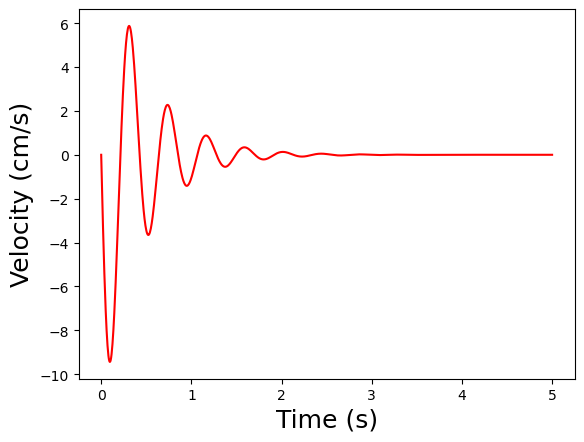

In [17]:
# Four people get in the car
simulate_driver_getting_in(driver_mass=4*80)

## Second Order Linear ODE Systems

### Generalized Model

More generally, the second order linear system with a single state is:

$$
\ddot{x} + \omega_{n}^2 x + 2 \zeta \omega_{n} \dot{x} = \omega_n^2 K_p u(t)
$$

Where:
* $\omega_n$ is the natural frequency, i.e., frequency of oscillations with no forcing $u(t) = 0$, 
* $\zeta$ is the damping coefficient, and 
* $K_p$ is the gain.

This can be also written using the [second order characteristic time](https://apmonitor.com/pdc/index.php/Main/SecondOrderSystems) $\tau_s = \omega_n^{-1}$:

$$
\tau_s^2 \ddot{x} + 2 \zeta \dot{x} + x = K_p u(t)
$$

These general forms are convienent because there are three "modes" of the analytic solution, depending on the value of $\zeta$. Here $\bar{x}$ is the steady-state after a step change in the input.

### Overdamped ($\zeta > 1$)

$$
x(t) = \bar{x} \left(1 - e^{-\zeta \omega_n t} \left[ \cosh \left(t \omega_n \sqrt{\zeta^2 - 1} \right) + \frac{\zeta}{\sqrt{\zeta^2 - 1}}   \sinh \left(t \omega_n \sqrt{\zeta^2 - 1}  \right) \right]   \right)
$$

### Criticall Damped ($\zeta = 1$)

$$
x(t) = \bar{x} \left[1 - \left(1 + t \omega_n \right) e^{-t \omega_n} \right]
$$

### Underdamped ($\zeta < 1$)

$$
x(t) = \bar{x} \left(1 - e^{-\zeta \omega_n t} \left[ \cos \left(t \omega_n \sqrt{\zeta^2 - 1} \right) + \frac{\zeta}{\sqrt{\zeta^2 - 1}}   \sin \left(t \omega_n \sqrt{1 - \zeta^2}  \right) \right]   \right)
$$

### Comparison of Modes

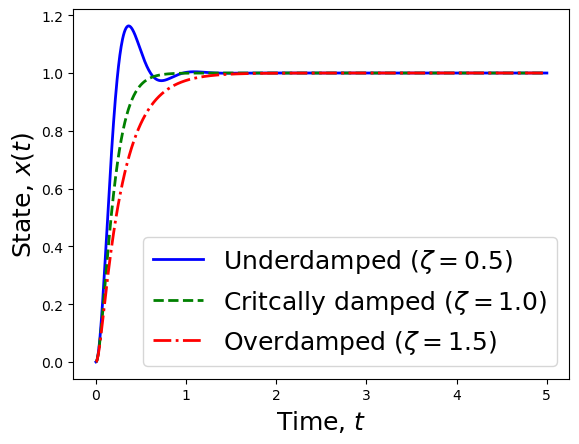

In [30]:
def second_order(t, xbar=1.0, zeta=1.0, omega=10):
    ''' Analytic solution of second order system

        Arguments:
            t: times to evaluate solution
            xbar: steady-state after step response
            zeta: damping coefficient
            omega: natural frequency
        
        Note: t and omega need to have consistent units (time and inverse time)

        Returns:
            x(t), states x evaluated at times t
    '''

    
    if np.abs(zeta - 1) < 1E-6:
        # Critically damped, zeta approx 1
        # Hint: need the tolerance 1E-6 because of float point errors
        return xbar*(1 - (1+t*omega)*np.exp(-t*omega))
    elif zeta > 1:
        # Overdamped, zeta > 1
        return xbar*(1-np.exp(-zeta*t*omega)*(np.cosh(t*omega*np.sqrt(zeta**2-1)) + (zeta/np.sqrt(zeta**2-1))*np.sinh(t*omega*np.sqrt(zeta**2 - 1))))
    else:
        # Underdampled (oscillates), zeta < 1
        return xbar*(1-np.exp(-zeta*t*omega)*(np.cos(t*omega*np.sqrt(1-zeta**2)) + (zeta/np.sqrt(1-zeta**2))*np.sin(t*omega*np.sqrt(1-zeta**2))))
    

teval = np.linspace(0,5,1001)
x_over = second_order(teval, zeta=1.5)
x_crit = second_order(teval, zeta=1.0)
x_under = second_order(teval, zeta=0.5)

plt.plot(teval,x_under,color="blue",linestyle="-",label="Underdamped ($\zeta = 0.5$)",linewidth=2)
plt.plot(teval,x_crit, color="green",linestyle="--",label="Critcally damped ($\zeta = 1.0$)",linewidth=2)
plt.plot(teval,x_over,color="red",linestyle="-.",label="Overdamped ($\zeta=1.5$)",linewidth=2)
plt.xlabel("Time, $t$",fontsize=18)
plt.ylabel("State, $x(t)$",fontsize=18)
plt.legend(fontsize=18)


### Spring-Mass-Damper Example

Now let's convert the spring-mass-damper systems into the general form. Recall,

$$
\dot{v} = -\frac{k}{m} x - \frac{c}{m} v + \frac{f(t)}{m}, \qquad \dot{x} = v
$$

which is equivalent to:

$$
\ddot{x} + \frac{k}{m} x + \frac{c}{m} \dot{x} = \frac{f(t)}{m}
$$

Comparing this to the general form, 

$$
\ddot{x} + \omega_{n}^2 x + 2 \zeta \omega_{n} \dot{x} = \omega_n^2 K_p u(t)
$$

we see that 

$$
\omega_n = \sqrt{\frac{k}{m}}, \qquad \zeta = \frac{c}{2 m \omega_n}~.
$$

Let's revist our example and run some calculations.

In [96]:
def suspension(t, y, f= lambda t: 0.0, k=1E5, c=2E3, m=450):
    ''' Linear model of a car suspension system

    Arguments:
    t: time (s)
    y: array of the state variables [x, v] 
        where x is the displacement (m) and v is the velocity (m/s)
    f: extenal forcing function (N)
    k: spring constant (N/m)
    c: damping constant (Ns/m)
    m: mass per wheel (kg)
    '''

    # unpack state variables
    x, v = y

    # derivative of velocity
    vdot = (-k*x - c*v + f(t))/m

    # derivative of displacement
    xdot = v

    return np.array([xdot, vdot])


def simulate_driver_getting_in(driver_mass=80, k=1E5, c=2E3):
    ''' Simulate the suspension system with a step input (driver getting in)

    Arguments:
    driver_mass: mass of the driver (kg)
    k: spring constant (N/m)
    c: damping constant (Ns/m)

    '''


    initial_conditions = [0.0, 0.0]
    t_span = [0, 5]
    t_eval = np.linspace(*t_span, 1000)
    g = 9.81 # m/s^2

    driver_gets_in = lambda t,y: suspension(t, y, lambda t_: -driver_mass*g/4, k, c)

    solution = scipy.integrate.solve_ivp(driver_gets_in, t_span, initial_conditions, t_eval=t_eval)
    plt.plot(solution.t, solution.y[0]*100,color='b')
    plt.xlabel('Time (s)',fontsize=18)
    plt.ylabel('Displacement (cm)',fontsize=18)
    plt.show()

    plt.plot(solution.t, solution.y[1]*100,color='r')
    plt.xlabel('Time (s)',fontsize=18)
    plt.ylabel('Velocity (cm/s)',fontsize=18)
    plt.show()

def car_revisited(car_mass = 4*450, driver_mass=80, k=1E5, c=2E3, verbose=True):
    ''' Convert car suspension example into 2nd order system general form

    Arguments:
        car_mass: total mass of the vehicle without driver (kg)
        driver_mass: total mass of the driver (kg)
        k: spring constant (N/m)
        c: damping constant (Ns/m)

    Returns:
        omega_n: natural frequency (1/s)
        zeta: critical coefficient (dimensionless)

    Notes:
        All masses are divided by 4 within the calculations to convert from total to per wheel.
        User should input total masses.

        This function returns omega and zeta for the loaded car
    '''

    if verbose:
        print("Spring constant, k =",round(k,0),"N/m")
        print("Damping constant, c =",round(c,0),"Ns/m")

    m = car_mass/4
    omega_n = np.sqrt(k/m)
    zeta = np.sqrt(c/(2*omega_n*m))
    
    if verbose:
        print("\nEmpty car, m =", round(m,1),"kg per wheel")
        print("omega_n =",round(omega_n,2), "1/s")
        print("zeta =",round(zeta,2), "dimensionless")
        
    m = (car_mass + driver_mass)/4
    omega_n = np.sqrt(k/m)
    zeta = np.sqrt(c/(2*omega_n*m))

    if verbose:
        print("\nLoaded car, m =", round(m,1),"kg per wheel")
        print("omega_n =",round(omega_n,2), "1/s")
        print("zeta =",round(zeta,2), "dimensionless")

    return omega_n, zeta

car_revisited()

Spring constant, k = 100000.0 N/m
Damping constant, c = 2000.0 Ns/m

Empty car, m = 450.0 kg per wheel
omega_n = 14.91 1/s
zeta = 0.39 dimensionless

Loaded car, m = 470.0 kg per wheel
omega_n = 14.59 1/s
zeta = 0.38 dimensionless


(14.586499149789455, 0.3819227559309533)

**Discussion Questions**:
* Is it okay to ignore how the change in mass $m$ impacts $\omega_n$ and $\zeta$ when analyzes the dynamic response of the suspension?
* How would you tune the suspension, i.e., change $k$ or $c$, to make it critically damped or overdamped?
* Is it better to have an overdamped, underdamped, or critically damped suspension?

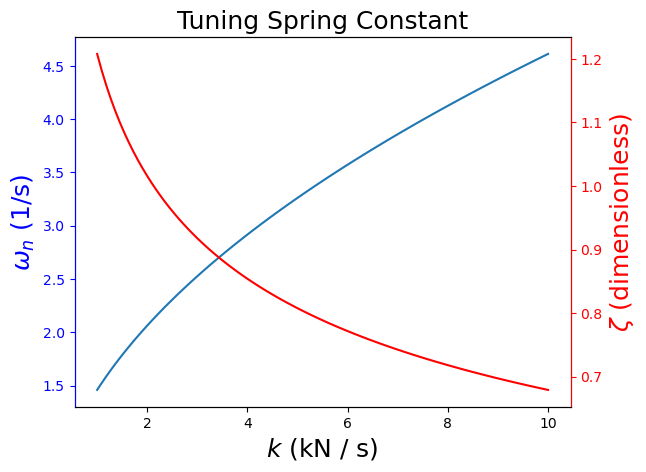

In [105]:
k_adjust = np.linspace(1E3,1E4,101)

omega, zeta = car_revisited(k=k_adjust,verbose=False)

fig, ax1 = plt.subplots()

ax1.plot(k_adjust/1E3,omega)
ax1.set_ylabel('$\omega_n$ (1/s)', color='blue',fontsize=18)
ax1.set_xlabel('$k$ (kN / s)',fontsize=18)
ax1.tick_params(axis='y', color='blue', labelcolor='blue')

ax1.set_title('Tuning Spring Constant',fontsize=18)

ax2 = ax1.twinx()
ax2.plot(k_adjust/1E3,zeta,'red')
ax2.set_ylabel('$\zeta$ (dimensionless)', color='red',fontsize=18)
ax2.tick_params(axis='y', color='red', labelcolor='red')
ax2.spines['right'].set_color('red')
ax2.spines['left'].set_color('blue')
plt.show()


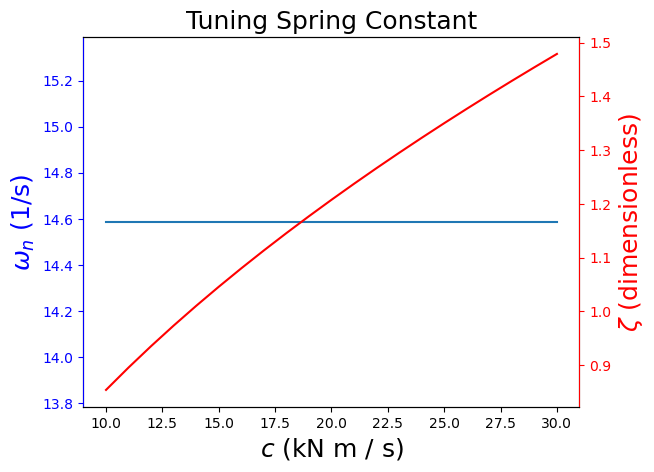

In [107]:
c_adjust = np.linspace(1E4,3E4,21)

omega, zeta = car_revisited(c=c_adjust,verbose=False)

# Convert from scalar to vector
omega = omega*np.ones(len(c_adjust))

fig, ax1 = plt.subplots()

ax1.plot(c_adjust/1E3,omega)
ax1.set_ylabel('$\omega_n$ (1/s)', color='blue',fontsize=18)
ax1.set_xlabel('$c$ (kN m / s)',fontsize=18)
ax1.tick_params(axis='y', color='blue', labelcolor='blue')

ax1.set_title('Tuning Spring Constant',fontsize=18)

ax2 = ax1.twinx()
ax2.plot(c_adjust/1E3,zeta,'red')
ax2.set_ylabel('$\zeta$ (dimensionless)', color='red',fontsize=18)
ax2.tick_params(axis='y', color='red', labelcolor='red')
ax2.spines['right'].set_color('red')
ax2.spines['left'].set_color('blue')
plt.show()

### Sensitivity of Eigenvalues

The dynamic response of the system depends on the eigenvalues of the (linear) differential equations.

The **real componenent** of the eigenvalues tell us...
* One or more positive real components of the eigenvalues --> system is unstable and one of the states will diverge to positive or negative infinity
* All negative real components of the eigenvalues --> system is stable and will approach steady-state
* One or more zero real components of the eigenvalues --> some of the states will neither decay or grow, often coincides with oscillations

The **imaginary components** of the eigenvalues tell us...
* Non-zero imaginary components of two of more eigenvales --> system response will oscillate
* All imaginary components of eigenvalues are zero --> system response will not oscillate
* Remember that imaginary eigenvalues come in conjugate pairs

Let's see these properties in action with our spring-mass-damper example. We start by writing the linear system in cannonical state-space form:

$$
\underbrace{\begin{bmatrix}
\dot{v} \\
\dot{x}
\end{bmatrix}}_{\mathbf{\dot{x}}} = 
\underbrace{\begin{bmatrix}
- \frac{c}{m} & -\frac{k}{m} \\
1 & 0
\end{bmatrix}}_{\mathbf{A}}
\underbrace{\mathbf{\begin{bmatrix} v \\ x
\end{bmatrix}}}_{\mathbf{x}} = 
\underbrace{\begin{bmatrix}
\frac{1}{m} \\ 0
\end{bmatrix}}_{\mathbf{B}}
\underbrace{f(t)}_{\mathbf{u}}
$$

Next, we will calculate the eigenvalues of $\mathbf{A}$.

In [76]:
import sympy
c, m, k = sympy.symbols('c m k')
A = sympy.Matrix([[-c/m, -k/m],[1, 0]])
print("A =\n",A)

print("Eigenvalues(A) =",)
print(A.eigenvals())

A =
 Matrix([[-c/m, -k/m], [1, 0]])
Eigenvalues(A) =
{-c/(2*m) - sqrt(c**2 - 4*k*m)/(2*m): 1, -c/(2*m) + sqrt(c**2 - 4*k*m)/(2*m): 1}


$$\lambda_1 = \frac{-c}{2m} - \frac{\sqrt{c^2 - 4 k m}}{2 m}, \qquad \lambda_2 = \frac{-c}{2m} + \frac{\sqrt{c^2 - 4 k m}}{2 m}$$

We see these eigenvalues are imaginary when

$$
c^2 < 4 k m \Leftrightarrow \frac{c^2}{4 k m} < 1 \Leftrightarrow \zeta^2 < 1
$$

The real components of both eigenvalues are positive when

$$
\frac{c}{2m} < \frac{\sqrt{c^2 - 4 k m}}{2m} \Leftrightarrow c < \sqrt{c^2 - 4 k m} \Leftrightarrow c^2 < c^2 - 4 k m
$$

This would require $km < 0$, which is not possible because $k > 0$, $c > 0$, and $m > 0$ for the model to be physically realistic. Therefore, the real components must be negative.

This analysis explains the behavior of our simulations for this system so far!

In [97]:
def eigenvalues_car_revisited(car_mass = 4*450, driver_mass=80, k=1E5, c=2E3, verbose=True):
    ''' Convert car suspension example into 2nd order system general form

    Arguments:
        car_mass: total mass of the vehicle without driver (kg)
        driver_mass: total mass of the driver (kg)
        k: spring constant (N/m)
        c: damping constant (Ns/m)

    Returns:
        eigenvalues

    Notes:
        All masses are divided by 4 within the calculations to convert from total to per wheel.
        User should input total masses.

        This function assumes k and c are scalars!

    '''

    
    
    if verbose:
        print("Spring constant, k =",round(k,0),"N/m")
        print("Damping constant, c =",round(c,0),"Ns/m")

    m = car_mass/4
    omega_n = np.sqrt(k/m)
    zeta = np.sqrt(c/(2*omega_n*m))
    A = np.array([[-c/m, -k/m],[1.,0]])
    evals, evec = np.linalg.eig(A)
    
    if verbose:
        print("\nEmpty car, m =", round(m,1),"kg per wheel")
        print("omega_n =",round(omega_n,2), "1/s")
        print("zeta =",round(zeta,2), "dimensionless")
        print("eignvalues=",evals)

    m = (car_mass + driver_mass)/4
    omega_n = np.sqrt(k/m)
    zeta = np.sqrt(c/(2*omega_n*m))
    A = np.array([[-c/m, -k/m],[1.,0]])
    evals, evec = np.linalg.eig(A)

    if verbose:
        print("\nLoaded car, m =", round(m,1),"kg per wheel")
        print("omega_n =",round(omega_n,2), "1/s")
        print("zeta =",round(zeta,2), "dimensionless")
        print("eignvalues=",evals)

    return evals

eigenvalues_car_revisited()

Spring constant, k = 100000.0 N/m
Damping constant, c = 2000.0 Ns/m

Empty car, m = 450.0 kg per wheel
omega_n = 14.91 1/s
zeta = 0.39 dimensionless
eignvalues= [-2.22222222+14.74055462j -2.22222222-14.74055462j]

Loaded car, m = 470.0 kg per wheel
omega_n = 14.59 1/s
zeta = 0.38 dimensionless
eignvalues= [-2.12765957+14.43048933j -2.12765957-14.43048933j]


array([-2.12765957+14.43048933j, -2.12765957-14.43048933j])

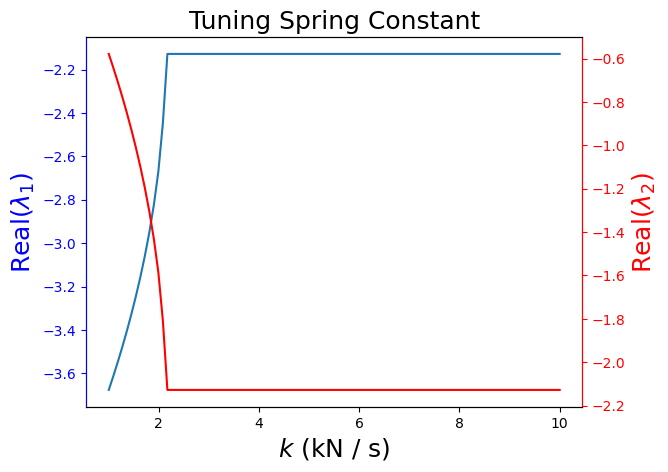

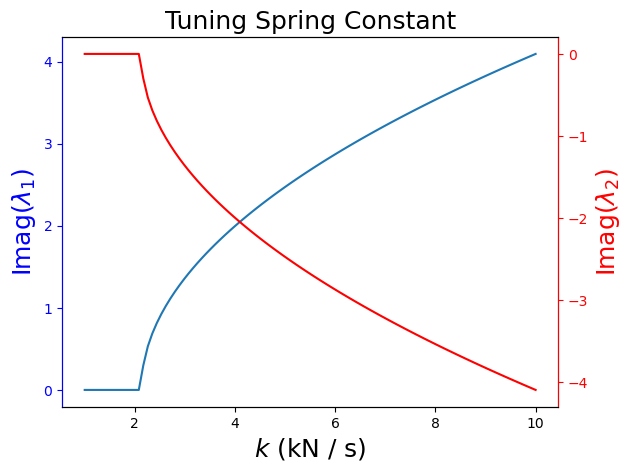

In [106]:
# Perform sensitivity analysis of eigenvalues to k
k_adjust = np.linspace(1E3,1E4,101)

evals = np.zeros((len(k_adjust),2),dtype = complex)


for i in range(len(k_adjust)):
    evals[i,:] = eigenvalues_car_revisited(k=k_adjust[i],verbose=False)

fig, ax1 = plt.subplots()

ax1.plot(k_adjust/1E3,np.real(evals[:,0]))
ax1.set_ylabel('Real($\lambda_1$)', color='blue',fontsize=18)
ax1.set_xlabel('$k$ (kN / s)',fontsize=18)
ax1.tick_params(axis='y', color='blue', labelcolor='blue')
ax1.set_title('Tuning Spring Constant',fontsize=18)
ax2 = ax1.twinx()
ax2.plot(k_adjust/1E3,np.real(evals[:,1]),'red')
ax2.set_ylabel('Real($\lambda_2$)', color='red',fontsize=18)
ax2.tick_params(axis='y', color='red', labelcolor='red')
ax2.spines['right'].set_color('red')
ax2.spines['left'].set_color('blue')
plt.show()

fig, ax1 = plt.subplots()

ax1.plot(k_adjust/1E3,np.imag(evals[:,0]))
ax1.set_ylabel('Imag($\lambda_1$)', color='blue',fontsize=18)
ax1.set_xlabel('$k$ (kN / s)',fontsize=18)
ax1.tick_params(axis='y', color='blue', labelcolor='blue')
ax1.set_title('Tuning Spring Constant',fontsize=18)
ax2 = ax1.twinx()
ax2.plot(k_adjust/1E3,np.imag(evals[:,1]),'red')
ax2.set_ylabel('Imag($\lambda_2$)', color='red',fontsize=18)
ax2.tick_params(axis='y', color='red', labelcolor='red')
ax2.spines['right'].set_color('red')
ax2.spines['left'].set_color('blue')
plt.show()

[[-10.63829787+9.979608j   -10.63829787-9.979608j  ]
 [-11.70212766+8.7078221j  -11.70212766-8.7078221j ]
 [-12.76595745+7.05664849j -12.76595745-7.05664849j]
 [-13.82978723+4.63712654j -13.82978723-4.63712654j]
 [-17.90258205+0.j         -11.88465199+0.j        ]
 [-22.42847078+0.j          -9.48642284+0.j        ]
 [-25.79384176+0.j          -8.24871143+0.j        ]
 [-28.77646343+0.j          -7.39374934+0.j        ]
 [-31.5552168 +0.j          -6.74265554+0.j        ]
 [-34.20526217+0.j          -6.22026975+0.j        ]
 [-36.76619125+0.j          -5.78700024+0.j        ]
 [-39.26167417+0.j          -5.41917689+0.j        ]
 [-41.70707504+0.j          -5.1014356 +0.j        ]
 [-44.1129631 +0.j          -4.82320711+0.j        ]
 [-46.48693149+0.j          -4.57689829+0.j        ]
 [-48.8346223 +0.j          -4.35686706+0.j        ]
 [-51.16034259+0.j          -4.15880635+0.j        ]
 [-53.46745394+0.j          -3.97935458+0.j        ]
 [-55.75862897+0.j          -3.81583912+0.j   

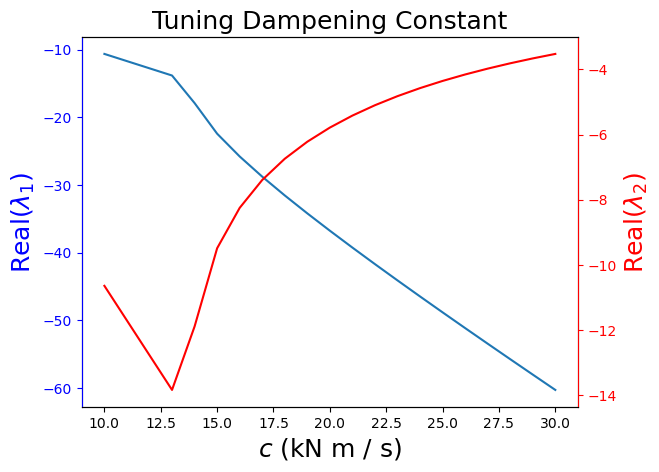

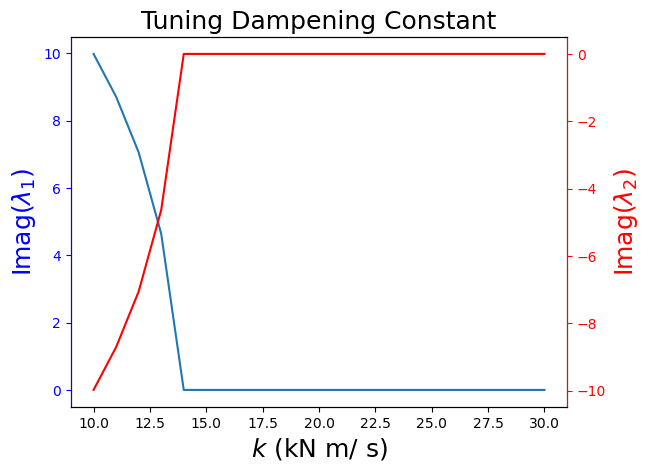

In [108]:
# Perform sensitivity analysis of eigenvalues to c

c_adjust = np.linspace(1E4,3E4,21)

evals = np.zeros((len(c_adjust),2),dtype = complex)



for i in range(len(c_adjust)):
    evals[i,:] = eigenvalues_car_revisited(c=c_adjust[i],verbose=False)

print(evals)

fig, ax1 = plt.subplots()

ax1.plot(c_adjust/1E3,np.real(evals[:,0]))
ax1.set_ylabel('Real($\lambda_1$)', color='blue',fontsize=18)
ax1.set_xlabel('$c$ (kN m / s)',fontsize=18)
ax1.tick_params(axis='y', color='blue', labelcolor='blue')
ax1.set_title('Tuning Dampening Constant',fontsize=18)
ax2 = ax1.twinx()
ax2.plot(c_adjust/1E3,np.real(evals[:,1]),'red')
ax2.set_ylabel('Real($\lambda_2$)', color='red',fontsize=18)
ax2.tick_params(axis='y', color='red', labelcolor='red')
ax2.spines['right'].set_color('red')
ax2.spines['left'].set_color('blue')
plt.show()

fig, ax1 = plt.subplots()

ax1.plot(c_adjust/1E3,np.imag(evals[:,0]))
ax1.set_ylabel('Imag($\lambda_1$)', color='blue',fontsize=18)
ax1.set_xlabel('$k$ (kN m/ s)',fontsize=18)
ax1.tick_params(axis='y', color='blue', labelcolor='blue')
ax1.set_title('Tuning Dampening Constant',fontsize=18)
ax2 = ax1.twinx()
ax2.plot(c_adjust/1E3,np.imag(evals[:,1]),'red')
ax2.set_ylabel('Imag($\lambda_2$)', color='red',fontsize=18)
ax2.tick_params(axis='y', color='red', labelcolor='red')
ax2.spines['right'].set_color('red')
ax2.spines['left'].set_color('blue')
plt.show()

## General Linear ODE Systems

### Analytic Solution

### Simulation with `scipy.signal`

## Root Locus Analysis

### Main Idea

### Calculation with `scipy.signal`

## Frequency Response

### Motivation

### Calculation with `scipy.signal`